<a href="https://colab.research.google.com/github/YouMinJung/RockScissorPaper_Classifier/blob/main/Rock_Scissor_Paper_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class Classifier

Classifier the Rock, Paper, and Scissors poses using [Rock-Paper-Scissors dataset](http://www.laurencemoroney.com/rock-paper-scissors-dataset/).
<br/>
This dataset is CGI dataset, and each image is 300×300 pixels in 24-bit color.

## Download and Prepare the Dataset

In [1]:
# Download the train set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
    
# Download the test set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip

--2022-07-19 03:25:38--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.214.128, 173.194.215.128, 173.194.216.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191.38M   167MB/s    in 1.1s    

2022-07-19 03:25:39 (167 MB/s) - ‘rps.zip’ saved [200682221/200682221]

--2022-07-19 03:25:39--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.128, 172.217.204.128, 142.250.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-t

In [2]:
import zipfile

# Extract the archive
local_zip = './rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-train')
zip_ref.close()

local_zip = './rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/rps-test')
zip_ref.close()

In [3]:
import os

base_dir = 'tmp/rps-train/rps'

rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock07-k03-091.png', 'rock03-058.png', 'rock04-113.png', 'rock05ck01-045.png', 'rock01-028.png', 'rock02-057.png', 'rock04-014.png', 'rock03-113.png', 'rock03-098.png', 'rock02-109.png']
['paper02-071.png', 'paper03-028.png', 'paper05-035.png', 'paper02-002.png', 'paper06-011.png', 'paper05-087.png', 'paper05-048.png', 'paper05-107.png', 'paper06-117.png', 'paper02-073.png']
['testscissors01-108.png', 'scissors03-028.png', 'scissors02-039.png', 'testscissors02-071.png', 'scissors01-018.png', 'testscissors02-044.png', 'scissors01-057.png', 'testscissors01-020.png', 'scissors02-077.png', 'testscissors01-023.png']


## Build the Model
I will use 4 convolution layers with 64-64-128-128 filters then append a Dropout layer to avoid overfitting and some Dense layers for the classification. 
<br/>
The output layer would be a 3-neuron dense layer activated by Softmax. 
<br/>
The order of this 3-neuron output would be paper-rock-scissors.

In [4]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [5]:
# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

## Prepare the ImageDataGenerator

In [6]:
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "tmp/rps-train/rps"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "tmp/rps-test/rps-test-set"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


## Train the model and evaluate the results

In [8]:
# Train the model
history = model.fit(train_generator, epochs=100, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/100
20/20 [==============================] - 22s 1s/step - loss: 1.1068 - accuracy: 0.3575 - val_loss: 1.0453 - val_accuracy: 0.5591
Epoch 2/100
20/20 [==============================] - 20s 1s/step - loss: 0.9843 - accuracy: 0.4992 - val_loss: 0.7904 - val_accuracy: 0.5672
Epoch 3/100
20/20 [==============================] - 20s 1s/step - loss: 0.7899 - accuracy: 0.6333 - val_loss: 0.4516 - val_accuracy: 0.8333
Epoch 4/100
20/20 [==============================] - 21s 1s/step - loss: 0.5756 - accuracy: 0.7552 - val_loss: 0.2517 - val_accuracy: 0.9032
Epoch 5/100
20/20 [==============================] - 21s 1s/step - loss: 0.5234 - accuracy: 0.7766 - val_loss: 0.3751 - val_accuracy: 0.8145
Epoch 6/100
20/20 [==============================] - 20s 1s/step - loss: 0.4318 - accuracy: 0.8234 - val_loss: 0.1279 - val_accuracy: 0.9543
Epoch 7/100
20/20 [==============================] - 20s 999ms/step - loss: 0.5055 - accuracy: 0.7996 - val_loss: 0.3930 - val_accuracy: 0.9597
Epoch 8/10

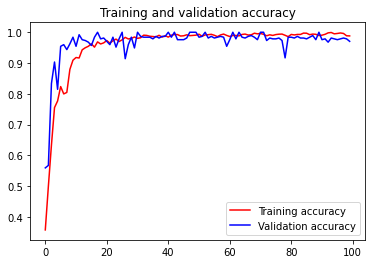

<Figure size 432x288 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

## Model Prediction

In [10]:
## CODE BLOCK FOR NON-SAFARI BROWSERS

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving 11.JPG to 11.JPG
11.JPG
[[1. 0. 0.]]


In [ ]:
# CODE BLOCK FOR SAFARI USERS

import os
import numpy as np
from keras.preprocessing import image

images = os.listdir("/tmp/images")

print(images)

for i in images:
  print()
  
  # predicting images
  path = '/tmp/images/' + i
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
    
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(path)
  print(classes)